Import Required Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


Load Iris Dataset

In [2]:
iris = load_iris()

X = iris.data        # all 4 features
y = iris.target     # class labels


Train–Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


Build CART Classifier

In [4]:
clf = DecisionTreeClassifier(
    criterion="gini",      # CART uses Gini
    max_depth=3,           # prevent overfitting
    random_state=42
)


Train the Model

In [5]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

Make Predictions

In [6]:
y_pred = clf.predict(X_test)


Accuracy

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9777777777777777


Precision, Recall, F1-Score

In [8]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9791666666666666
Recall: 0.9777777777777779
F1 Score: 0.9777530589543938


Confusion Matrix

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


Classification Report (All Metrics Together)

In [10]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



(Optional) Visualize the CART Tree

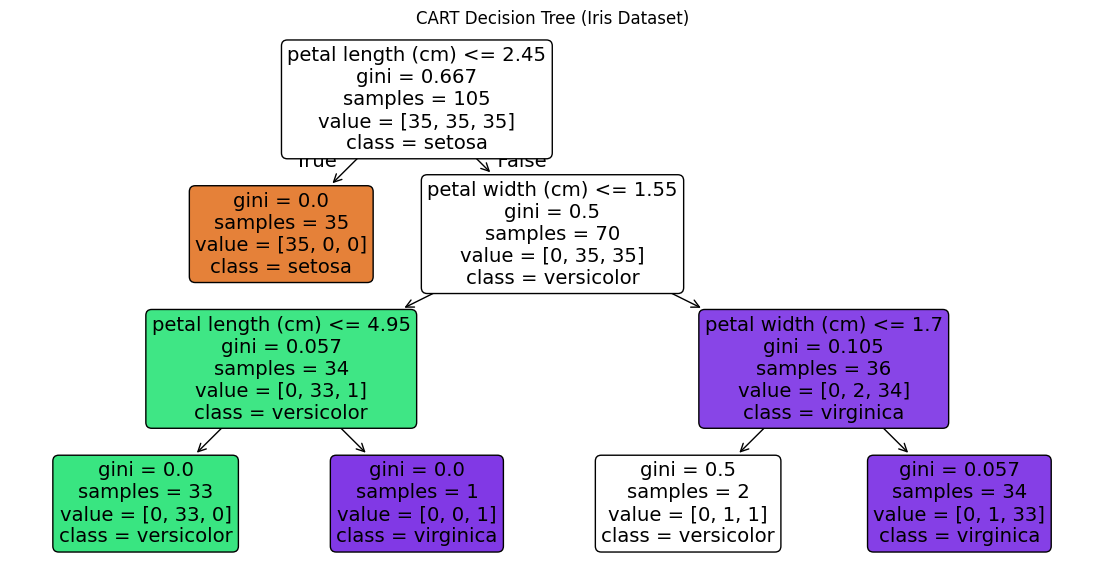

In [11]:
plt.figure(figsize=(14, 7))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title("CART Decision Tree (Iris Dataset)")
plt.show()


# **CART Regression**

Import Required Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)


Create a Simple Regression Dataset

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, :3]   # sepal length, sepal width, petal width
y = iris.data[:, 2]    # target = petal length (continuous)


Train-test Split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)


Built CART Regerssor

In [15]:
reg = DecisionTreeRegressor(
    criterion="squared_error",  # CART regression criterion
    max_depth=3,
    random_state=42
)


Train the model

In [16]:
reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

Make Predictions

In [17]:
y_pred = reg.predict(X_test)


Mean Squared Error (MSE)

In [18]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.045869245438141554


Mean Absolute Error (MAE)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.16852327624066765


R² Score

In [20]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9863969412394612


Visualize CART Regression Tree

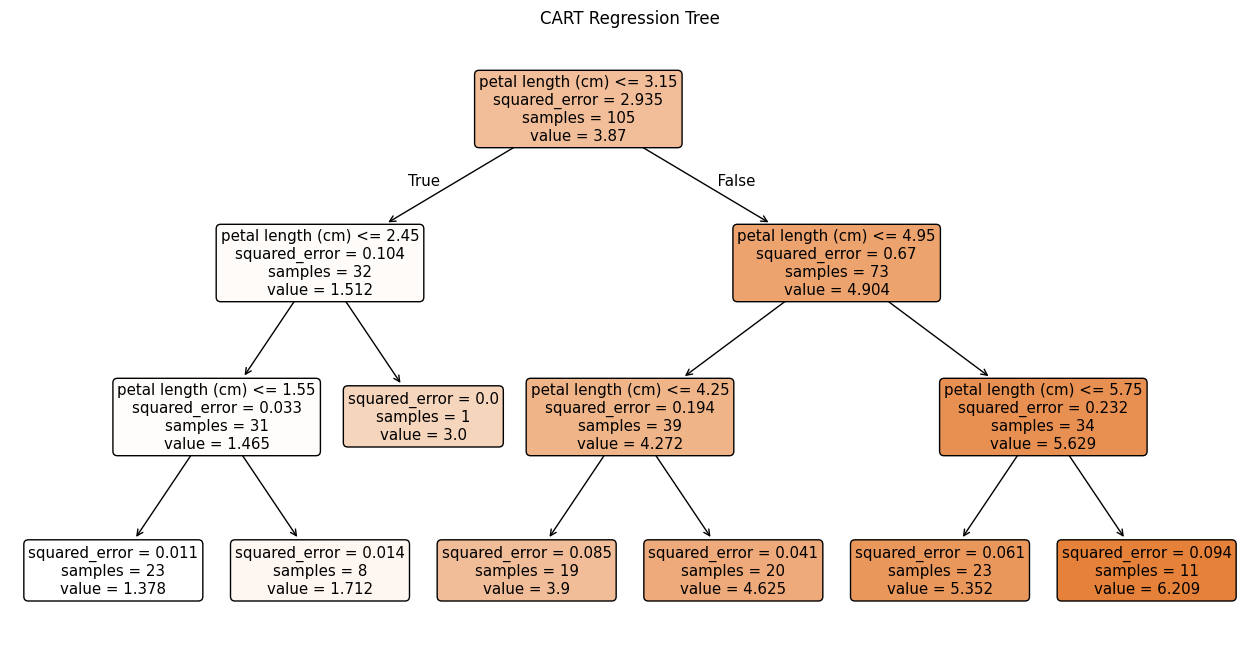

In [21]:
plt.figure(figsize=(16, 8))
plot_tree(
    reg,
    feature_names=iris.feature_names[:3],
    filled=True,
    rounded=True
)
plt.title("CART Regression Tree")
plt.show()
